# Phase estimation with QCNN
## States preparation

In [1]:
### IMPORTS ###
# Quantum libraries:
import pennylane as qml
from pennylane import numpy as np

# Plotting
from matplotlib import pyplot as plt

# Other
import copy
from tqdm.notebook import tqdm # Pretty progress bars
from IPython.display import Markdown, display # Better prints
import joblib # Writing and loading
##############


In [2]:
from qfuncs import *

In [3]:
N = 8
shots = 1000

dev = qml.device('default.qubit', wires=N, shots=shots)
H = qml_build_H(N, 0, 0)
@qml.qnode(dev)
def vqe_cost_fn(param):
    vqe_ising_chain_circuit(param, N)
    # return <psi|H|psi>
    return qml.expval(H)

In [4]:
drawer = qml.draw(vqe_cost_fn)
print(drawer(np.array([0]*(4*N))))

0: ──RY(0.00)─╭C──RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────────────────────────
1: ──RY(0.00)─╰X─╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────────────────────────
2: ──RY(0.00)────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────
3: ──RY(0.00)──────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────
4: ──RY(0.00)────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────
5: ──RY(0.00)──────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)
6: ──RY(0.00)────────────────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)
7: ──RY(0.00)──────────────────────────────────────────────────────╰X─────────RY(0.00)──RZ(0.00)

────────────┤ ╭<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
───RY(0.00)─┤ ├<𝓗>
───RY(0.00)─┤ ╰<𝓗>


***Parameters:***

step_size = 0.01 (Step size of the optimizer)
epochs    = 600 (Max epochs for each lambda)
N         = 8 (Number of spins of the system)


***Circuit:***

0: ──RY(0.00)─╭C──RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────────────────────────
1: ──RY(0.00)─╰X─╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────────────────────────
2: ──RY(0.00)────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────
3: ──RY(0.00)──────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────
4: ──RY(0.00)────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────
5: ──RY(0.00)──────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)
6: ──RY(0.00)────────────────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)
7: ──RY(0.00)──────────────────────────────────────────────────────╰X─────────RY(0.00)──RZ(0.00)

────────────┤ ╭<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
───RY(0.00)─┤ ├<𝓗>
───RY(0.00)─┤ ╰<𝓗>


  0%|          | 0/10 [00:00<?, ?it/s]

/home/saverio/anaconda3/envs/qc/lib/python3.8/site-packages/pennylane/ops/functions/eigvals.py:104: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires.Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


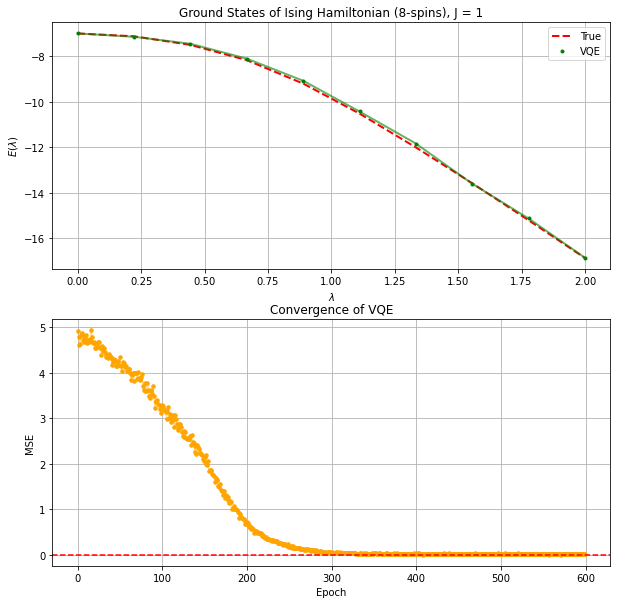

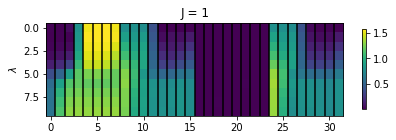

***Parameters:***

step_size = 0.01 (Step size of the optimizer)
epochs    = 600 (Max epochs for each lambda)
N         = 8 (Number of spins of the system)


***Circuit:***

0: ──RY(0.00)─╭C──RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────────────────────────
1: ──RY(0.00)─╰X─╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────────────────────────
2: ──RY(0.00)────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────
3: ──RY(0.00)──────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────
4: ──RY(0.00)────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────
5: ──RY(0.00)──────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)
6: ──RY(0.00)────────────────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)
7: ──RY(0.00)──────────────────────────────────────────────────────╰X─────────RY(0.00)──RZ(0.00)

────────────┤ ╭<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
───RY(0.00)─┤ ├<𝓗>
───RY(0.00)─┤ ╰<𝓗>


  0%|          | 0/10 [00:00<?, ?it/s]

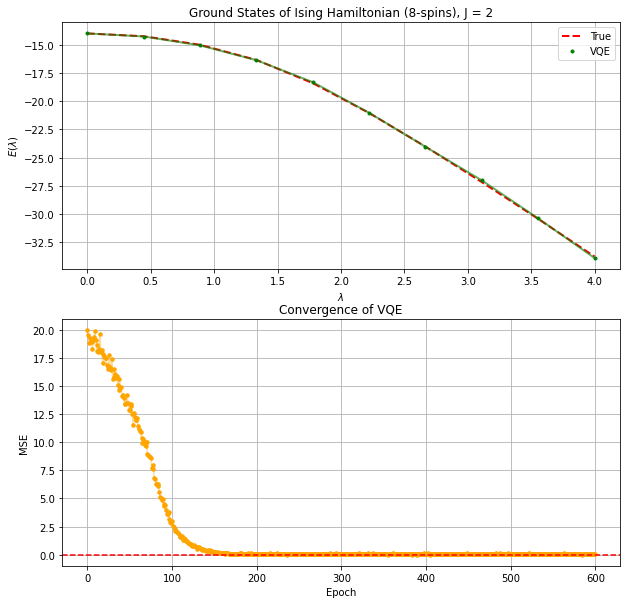

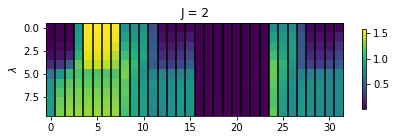

***Parameters:***

step_size = 0.01 (Step size of the optimizer)
epochs    = 600 (Max epochs for each lambda)
N         = 8 (Number of spins of the system)


***Circuit:***

0: ──RY(0.00)─╭C──RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────────────────────────
1: ──RY(0.00)─╰X─╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────────────────────────
2: ──RY(0.00)────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────────────────────────
3: ──RY(0.00)──────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)────────────────────
4: ──RY(0.00)────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)──────────
5: ──RY(0.00)──────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)──RY(0.00)
6: ──RY(0.00)────────────────────────────────────────────╰X────────╭C─────────RY(0.00)──RZ(0.00)
7: ──RY(0.00)──────────────────────────────────────────────────────╰X─────────RY(0.00)──RZ(0.00)

────────────┤ ╭<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
────────────┤ ├<𝓗>
───RY(0.00)─┤ ├<𝓗>
───RY(0.00)─┤ ╰<𝓗>


  0%|          | 0/10 [00:00<?, ?it/s]

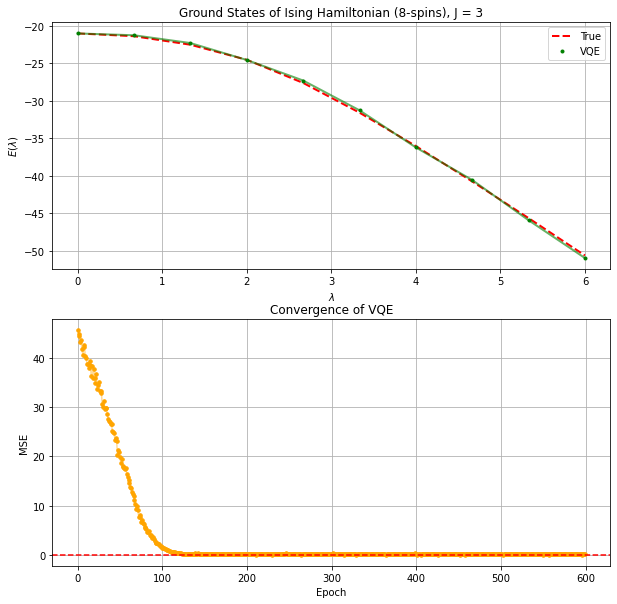

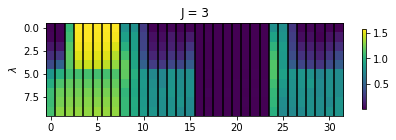

['./params.job']

In [5]:
thetas_arr = []

for J in [1,2,3]:
    vqe_e, errs, thetas, ys = train_vqe_ising(0.01, 10, 600, N, J, dev, circuit = True, plots = True)
    thetas_arr.append((J, thetas, ys))
    
joblib.dump(thetas_arr, './params.job')

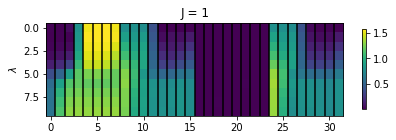

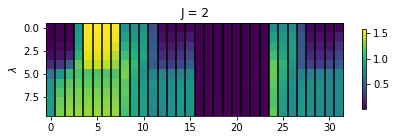

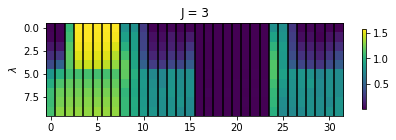

In [6]:
show_params_ising_chain(thetas_arr)

---
## Resources
* [Quantum Convolutional Neural Networks](https://arxiv.org/abs/1810.03787)
* [Machine Learning Phase Transitions with a Quantum Processor](https://arxiv.org/abs/1906.10155)